We study in this notebook algorithms which are more computationally expensive to run, but often perform better. In particular, we look at support vector machines and a simple multi-layer perceptron neural network.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
def select(query):
    
    conn = sqlite3.connect('./data/lending-club-loan-data/database2.sqlite')
    cursor = conn.cursor()
    temp_df = pd.DataFrame(cursor.execute(query).fetchall())
    temp_df.columns = list(map(lambda x: x[0], cursor.description))
    conn.close()
    
    return temp_df.copy()

In [3]:
# we read in the features with both the clustered and non-clustered categories for further evaluation

features_cluster_train = select('select * from final_cluster_features_train')
features_cluster_test = select('select * from final_cluster_features_test')

targets_train = select('select * from final_targets_train').loan_status
targets_test = select('select * from final_targets_test').loan_status

In [4]:
# we switch the labels so we can use sklearn's precision and recall functions to easily measure performance on defaults

targets_train = targets_train.apply(lambda x: (x-1)*-1)
targets_test = targets_test.apply(lambda x: (x-1)*-1)

In [5]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [6]:
# SVM turns out to be very computationally expensive, doesn't finish running after a very long time

In [7]:
# model performance is difficult to predict as we vary hidden layers..

recalls = []
precisions = []

for i in range(1,31):
    NN = MLPClassifier(hidden_layer_sizes=(i),random_state=2).fit(features_cluster_train,targets_train)
    precisions.append(precision_score(targets_test,NN.predict(features_cluster_test)))
    recalls.append(recall_score(targets_test,NN.predict(features_cluster_test)))

C:\Users\Pablo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


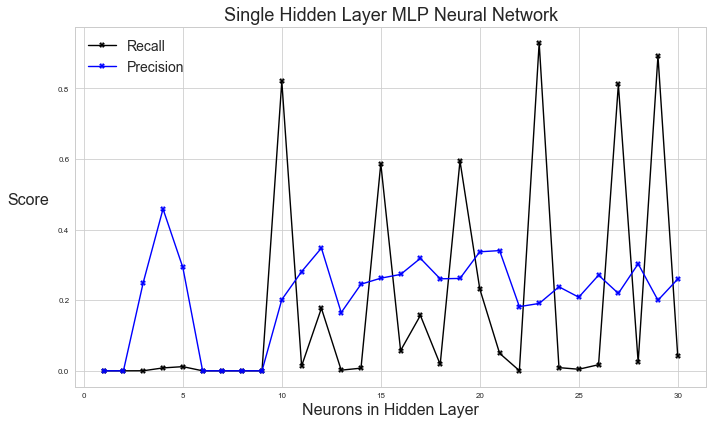

In [8]:
# the precision of the models stablizes (somewhat), but recall remains very erratic and difficult to characterize

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(list(range(1,31)),recalls,'Xk-')
ax.plot(list(range(1,31)),precisions,'Xb-')
ax.legend(['Recall','Precision'],fontsize=14)
ax.set_title('Single Hidden Layer MLP Neural Network',fontsize=18)
ax.set_xlabel('Neurons in Hidden Layer',fontsize=16)
ax.set_ylabel('Score',rotation=0,labelpad=30,fontsize=16)

plt.tight_layout()

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [10]:
# again, 1:1 ratio

ratio_dict = {1:targets_train.apply(lambda x: (x-1)*-1).sum(),0:targets_train.apply(lambda x: (x-1)*-1).sum()}

SMOTE_features, SMOTE_targets = SMOTE(ratio=ratio_dict,random_state=2).fit_sample(features_cluster_train,targets_train)
ADASYN_features, ADASYN_targets = ADASYN(ratio=ratio_dict,random_state=2).fit_sample(features_cluster_train,targets_train)

In [11]:
# re-run with SMOTE resampled training data

recalls = []
precisions = []

for i in range(1,31):
    NN = MLPClassifier(hidden_layer_sizes=(i),random_state=2).fit(SMOTE_features,SMOTE_targets)
    precisions.append(precision_score(targets_test,NN.predict(features_cluster_test)))
    recalls.append(recall_score(targets_test,NN.predict(features_cluster_test)))

C:\Users\Pablo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


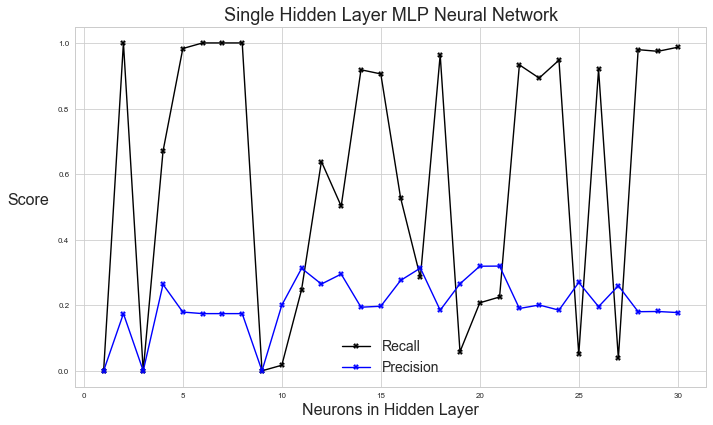

In [12]:
# recall remains erratic, but we are able to get much better recalls for about the same level of precision

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(list(range(1,31)),recalls,'Xk-')
ax.plot(list(range(1,31)),precisions,'Xb-')
ax.legend(['Recall','Precision'],fontsize=14)
ax.set_title('Single Hidden Layer MLP Neural Network',fontsize=18)
ax.set_xlabel('Neurons in Hidden Layer',fontsize=16)
ax.set_ylabel('Score',rotation=0,labelpad=30,fontsize=16)

plt.tight_layout()

In [13]:
# re-run with ADASYN resampled training data

recalls = []
precisions = []

for i in range(1,31):
    NN = MLPClassifier(hidden_layer_sizes=(i),random_state=2).fit(ADASYN_features,ADASYN_targets)
    precisions.append(precision_score(targets_test,NN.predict(features_cluster_test)))
    recalls.append(recall_score(targets_test,NN.predict(features_cluster_test)))

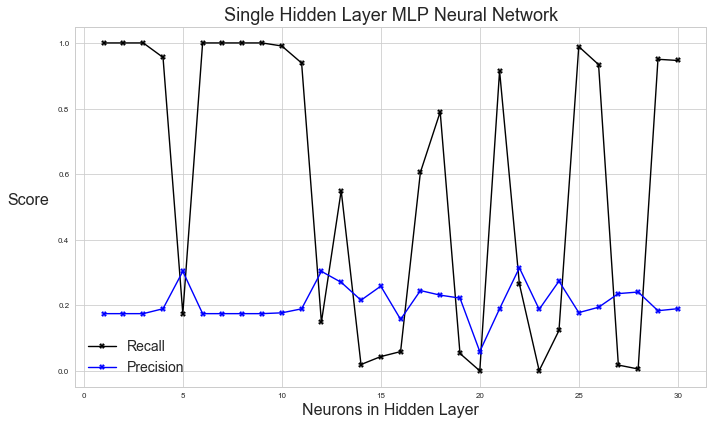

In [15]:
# the precision of the models stablizes (somewhat), but recall remains very erratic and difficult to characterize

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(list(range(1,31)),recalls,'Xk-')
ax.plot(list(range(1,31)),precisions,'Xb-')
ax.legend(['Recall','Precision'],fontsize=14)
ax.set_title('Single Hidden Layer MLP Neural Network',fontsize=18)
ax.set_xlabel('Neurons in Hidden Layer',fontsize=16)
ax.set_ylabel('Score',rotation=0,labelpad=30,fontsize=16)

plt.tight_layout()